# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [17]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 637


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [18]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | selfoss
Processing Record 3 of Set 1 | korla
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | qaqortoq
Processing Record 8 of Set 1 | wailua homesteads
Processing Record 9 of Set 1 | lerwick
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | sabang
Processing Record 12 of Set 1 | shenkursk
Processing Record 13 of Set 1 | vilyuchinsk
Processing Record 14 of Set 1 | olonkinbyen
Processing Record 15 of Set 1 | tanout
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | tazovsky
Processing Record 20 of Set 1 | whitehorse
Processing Record 21 of Set 1 | sur
Processing Reco

Processing Record 38 of Set 4 | alamo
Processing Record 39 of Set 4 | punta arenas
Processing Record 40 of Set 4 | saint-philippe
Processing Record 41 of Set 4 | minas de marcona
Processing Record 42 of Set 4 | lycksele
Processing Record 43 of Set 4 | nar'yan-mar
Processing Record 44 of Set 4 | savave village
City not found. Skipping...
Processing Record 45 of Set 4 | villa yapacani
Processing Record 46 of Set 4 | bandarbeyla
Processing Record 47 of Set 4 | namsos
Processing Record 48 of Set 4 | kouango
Processing Record 49 of Set 4 | anadyr
Processing Record 0 of Set 5 | puerto colombia
Processing Record 1 of Set 5 | vila franca do campo
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | kaa-khem
Processing Record 4 of Set 5 | haiku-pauwela
Processing Record 5 of Set 5 | crane
Processing Record 6 of Set 5 | keflavik
Processing Record 7 of Set 5 | sitka
Processing Record 8 of Set 5 | balkashino
Processing Record 9 of Set 5 | tual
Processing Record 10 of Set 5 | mahaj

City not found. Skipping...
Processing Record 31 of Set 8 | guarapari
Processing Record 32 of Set 8 | aginskoye
Processing Record 33 of Set 8 | ebon
Processing Record 34 of Set 8 | santa ana
Processing Record 35 of Set 8 | suwayr
Processing Record 36 of Set 8 | arkhangel'sk
Processing Record 37 of Set 8 | port mathurin
Processing Record 38 of Set 8 | genhe
Processing Record 39 of Set 8 | hangu
Processing Record 40 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 41 of Set 8 | cerro azul
Processing Record 42 of Set 8 | shingu
Processing Record 43 of Set 8 | lembar
City not found. Skipping...
Processing Record 44 of Set 8 | tabou
Processing Record 45 of Set 8 | kodinsk
Processing Record 46 of Set 8 | tulum
Processing Record 47 of Set 8 | molepolole
Processing Record 48 of Set 8 | uglegorsk
Processing Record 49 of Set 8 | rurrenabaque
Processing Record 0 of Set 9 | sandnessjoen
Processing Record 1 of Set 9 | anacapri
Processing Record 2 of Set 9 | hammerfest
Proce

Processing Record 16 of Set 12 | puerto santa
Processing Record 17 of Set 12 | bodo
Processing Record 18 of Set 12 | puerto aysen
Processing Record 19 of Set 12 | cockburn town
Processing Record 20 of Set 12 | khandud
Processing Record 21 of Set 12 | bantilan
Processing Record 22 of Set 12 | huai'an
Processing Record 23 of Set 12 | dwarka
Processing Record 24 of Set 12 | arraial do cabo
Processing Record 25 of Set 12 | kananga
Processing Record 26 of Set 12 | yeppoon
Processing Record 27 of Set 12 | aldinga beach
Processing Record 28 of Set 12 | puerto armuelles
Processing Record 29 of Set 12 | nouadhibou
Processing Record 30 of Set 12 | phan rang-thap cham
Processing Record 31 of Set 12 | rengo
Processing Record 32 of Set 12 | coyhaique
Processing Record 33 of Set 12 | dunedin
Processing Record 34 of Set 12 | awjilah
Processing Record 35 of Set 12 | taguatinga
Processing Record 36 of Set 12 | el quebrachal
Processing Record 37 of Set 12 | mangrol
Processing Record 38 of Set 12 | mount

In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          606
Lat           606
Lng           606
Max Temp      606
Humidity      606
Cloudiness    606
Wind Speed    606
Country       606
Date          606
dtype: int64

In [20]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,275.39,97,100,5.91,GS,1696263299
1,selfoss,63.9331,-20.9971,283.17,61,86,6.23,IS,1696263246
2,korla,41.7597,86.1469,292.77,30,83,3.01,CN,1696263452
3,tiksi,71.6872,128.8694,270.13,85,100,3.66,RU,1696263146
4,kingston,17.9970,-76.7936,306.62,68,20,1.54,JM,1696263297


In [21]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [22]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,275.39,97,100,5.91,GS,1696263299
1,selfoss,63.9331,-20.9971,283.17,61,86,6.23,IS,1696263246
2,korla,41.7597,86.1469,292.77,30,83,3.01,CN,1696263452
3,tiksi,71.6872,128.8694,270.13,85,100,3.66,RU,1696263146
4,kingston,17.9970,-76.7936,306.62,68,20,1.54,JM,1696263297


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

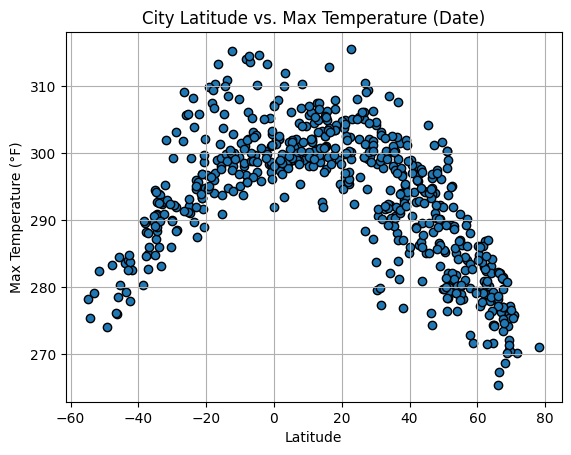

In [26]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

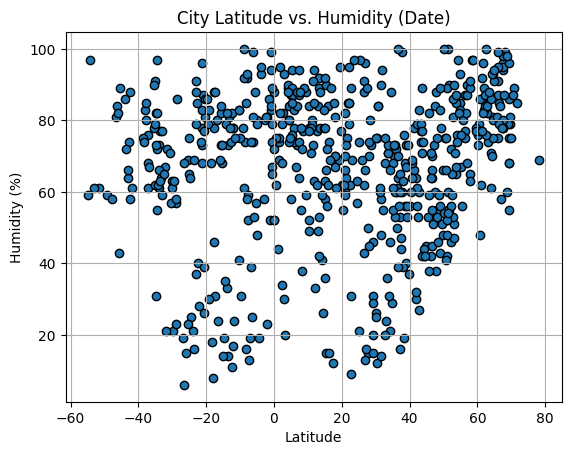

In [27]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

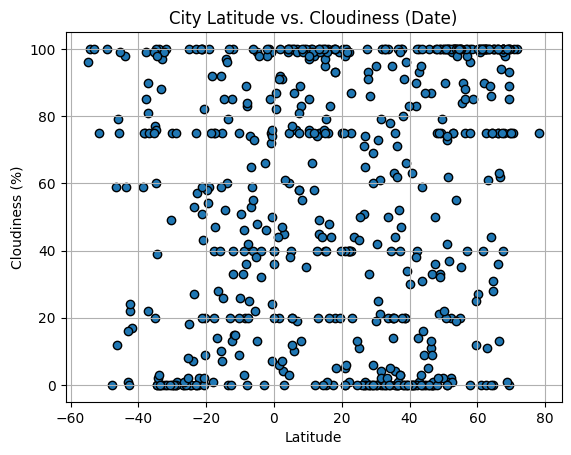

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

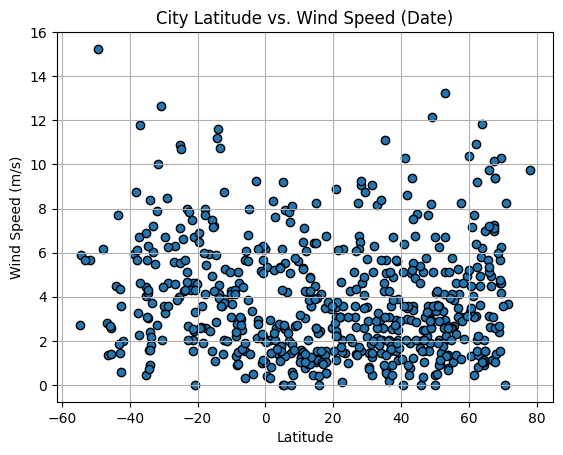

In [29]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker ="o", edgecolors=["black"])

# Get the date 
date = pd.to_datetime(city_data_df["Date"][0], unit="s").strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


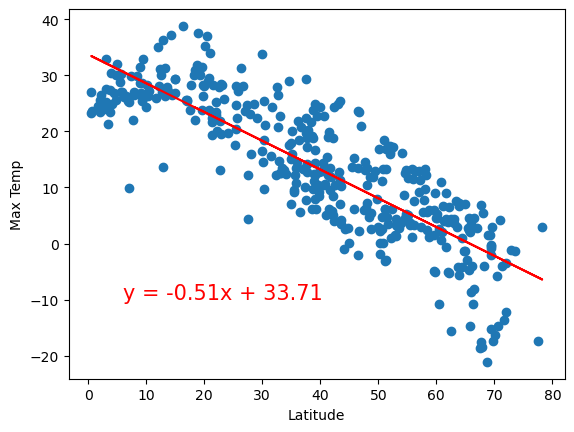

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


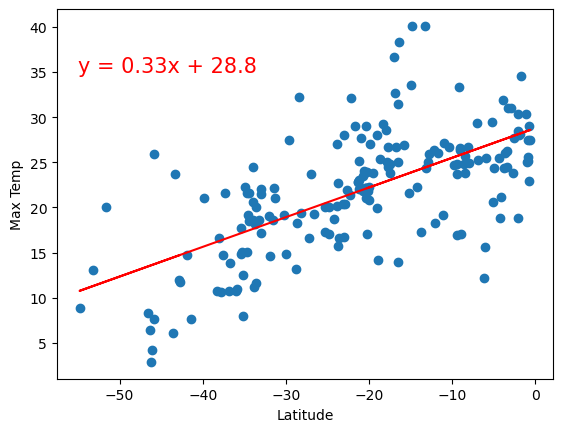

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


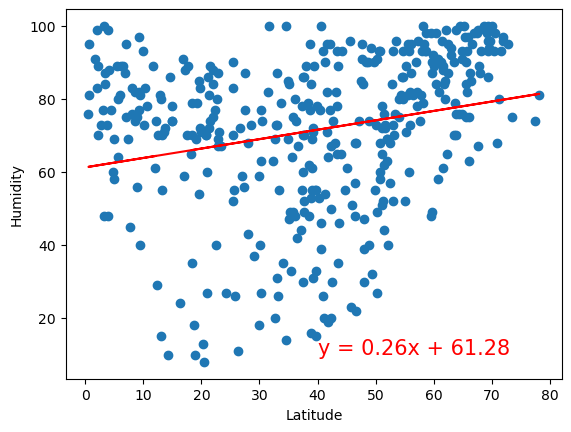

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


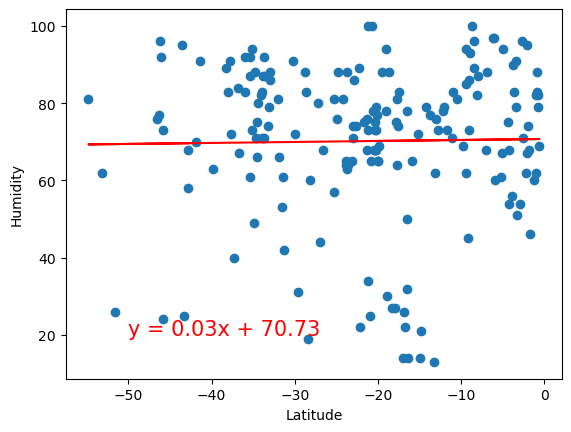

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


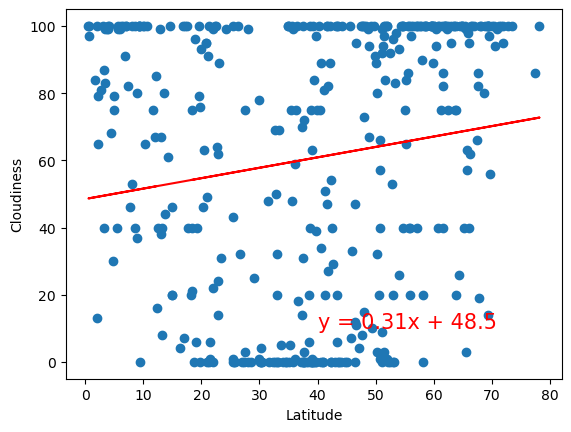

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


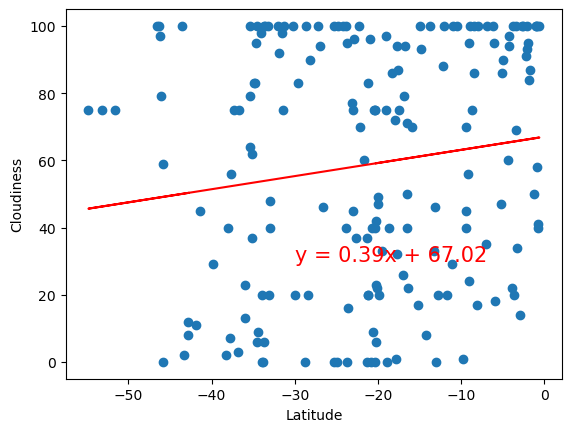

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


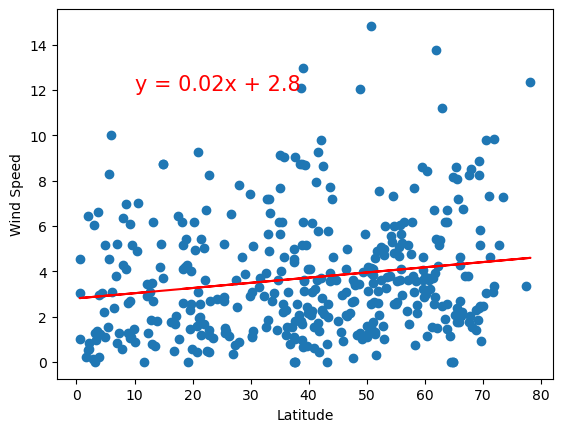

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


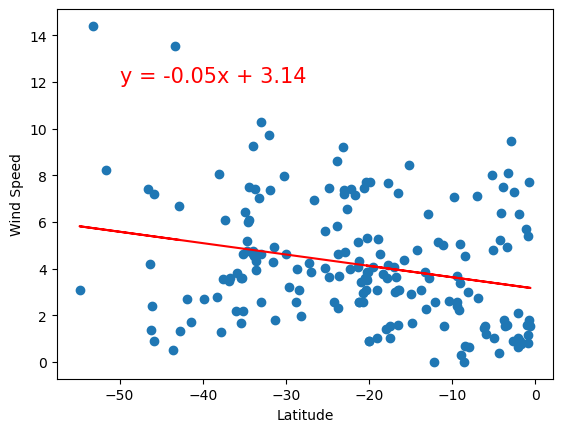

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE